<h1><center> 10-315 Introduction to Machine Learning (SCS Majors) <br> Lecture 14: Linear Regression </center></h1> 


<h1><center> Leila Wehbe <br> Carnegie Mellon University  <br> Machine Learning Department </center></h1> 


<br>

<br>

<br>

<br>


Reading: [Elements of Statistical Learning Chapters 3.1, 3.2, 3.4](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf).

### Lecture outcomes
- Linear regression definition 
- OLS solution and interpretation
- Ridge solution and tradeoff
- Lasso (just the penalty and what it optimizes for)

### Links (use the version you need)


- [Notebook](https://github.com/lwehbe/10315_S21/blob/main/Lecture_14_Linear_Regression.ipynb)

- [PDF slides](https://github.com/lwehbe/10315_S21/raw/main/Lecture_14_Linear_Regression.slides.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal 

# Sample data:
X = np.linspace(0,36,36)
coefs = [2,0.5]
Y = coefs[0] + coefs[1]*X + 2*norm.rvs(size = np.shape(X))
Y_seasonal = coefs[0] + coefs[1]*X + 4*np.sin(X*np.pi/6) + 0.5*norm.rvs(size = np.shape(X))

## Regression vs. Classification

- So far, we’ve been interested in learning P(Y|X) where Y has discrete values (‘classification’)

- What if Y is continuous? (‘regression’)
    - predict weight from gender, height, age, …
    - predict Google stock price today from Google, Yahoo, MSFT prices yesterday
    - predict each pixel intensity in robot’s next camera image, from current image and current action



## Linear regression

- We wish to learn a linear function $f:X\rightarrow Y$ where $Y\in \mathbb{R}$ given $\{(X_1,Y_1),...(X_n,Y_n)\}$ with $X_i \in \mathbb{R}^p$.



- Let's start with 1-dimensional X example (p=1):
    - We want to find the line that best "fits" the data
        - How do we define this best fit?

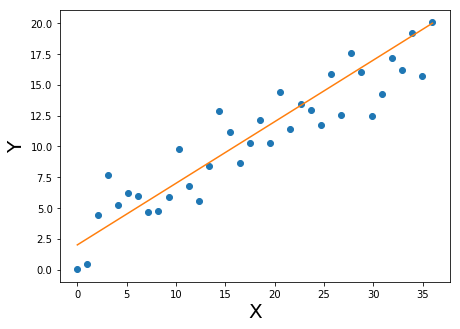

In [2]:
plt.figure(figsize=(7,5))
plt.plot(X,Y,'o');plt.xlabel('X', fontsize=20);plt.ylabel('Y',fontsize=20);
plt.plot(X,coefs[0]+coefs[1]*X)

### Linear Regression 

- Consider the example below where there exist a non-linear relationship that is a very good predictor of the data
    - namely there is a seasonal effect that varies with the months of the year, as well as a linear increase with time
    - linear regression is only able to capture linear relationships

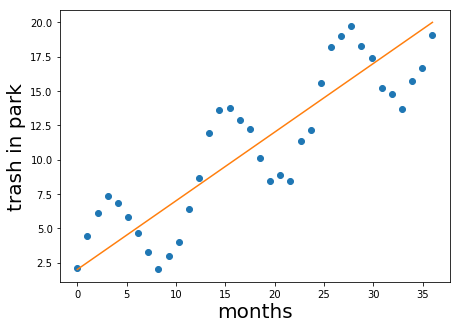

In [3]:
plt.figure(figsize=(7,5))
plt.plot(X,Y_seasonal,'o');plt.xlabel('months', fontsize=20);plt.ylabel('trash in park',fontsize=20);
plt.plot(X,coefs[0]+coefs[1]*X)

- even if the underlying relationship between $X$ and $Y$ is not linear, one can still use linear regression
    - the assumption is not satisfied, but we have seen previously that in some cases, a model can still perform well even if its assumptions are not specified

### How to define goodness of fit?

- We define the goodness of fit based on the prediction error:
    - $\epsilon_i = y_i-\hat y_i = y_i - (w_0 + w_1 x_i)$
    - vertical error in the plot below

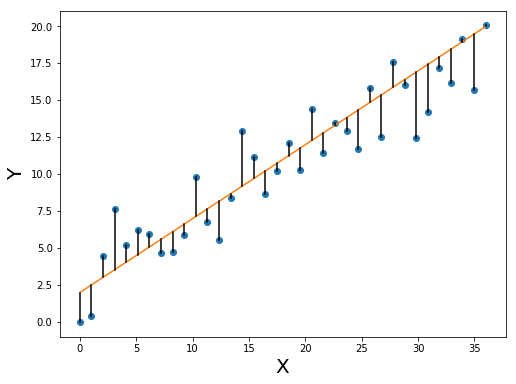

In [4]:
plt.figure(figsize=(8,6))
plt.plot(X,Y,'o');plt.xlabel('X', fontsize=20);plt.ylabel('Y',fontsize=20);
plt.plot(X,coefs[0]+coefs[1]*X)
for i,Xi in enumerate(X):
    plt.plot( [Xi,Xi], [coefs[0]+coefs[1]*Xi, Y[i]],'k')

### X In 2-D:

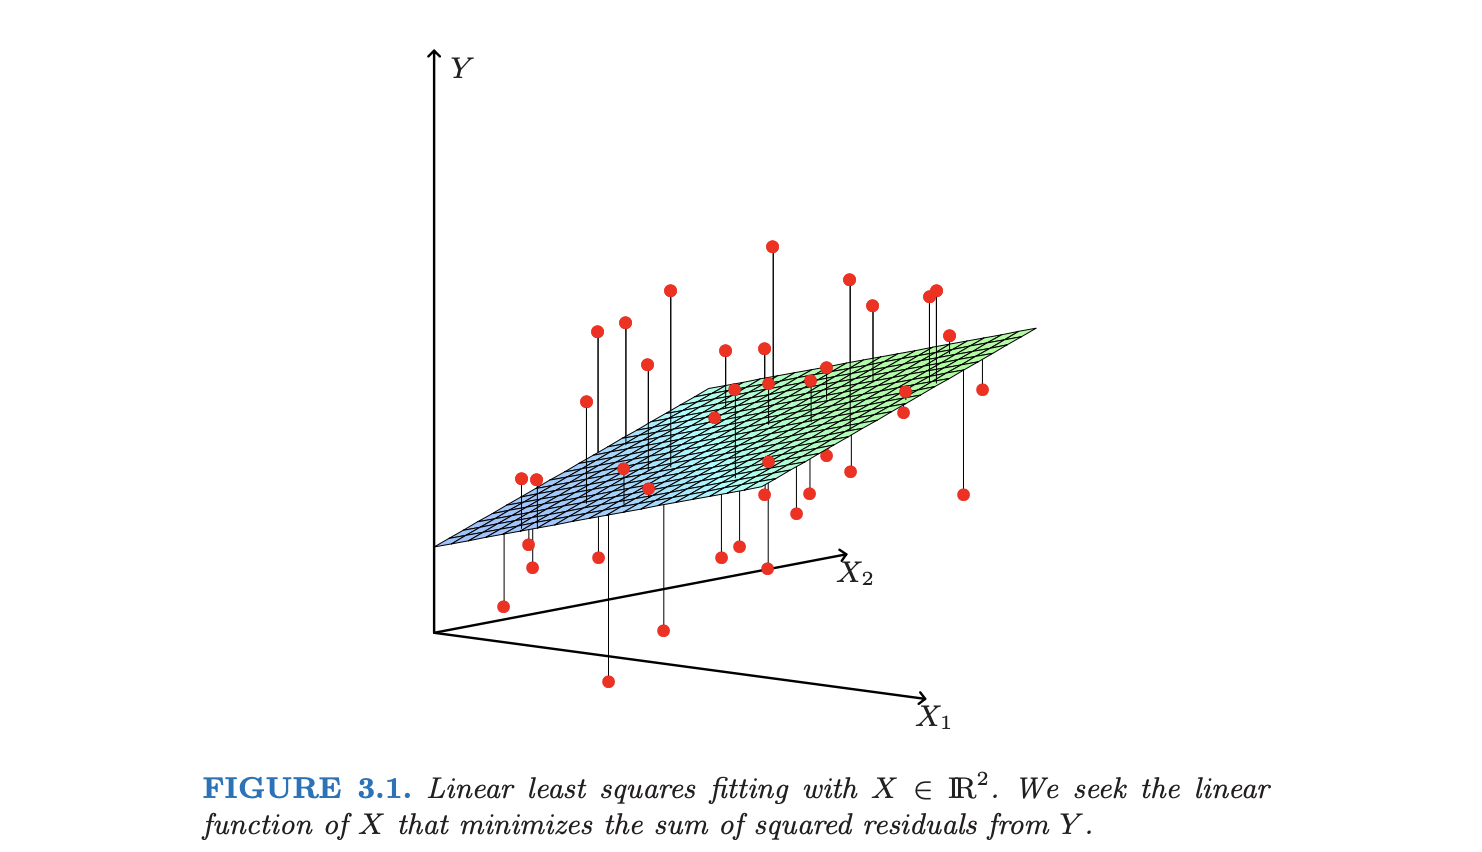

Source: Figure 3.1 from [ESL](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) 

## Approach 1: Minimizing the Residual Sum of Squares

- Ordinary Least Squares (OLS) minimizes the Residual Sum of Squares (RSS):

\begin{eqnarray}
\text{RSS}({\bf w}) =  \sum_{i=1}^n \left(y_i - (w_0+ \sum_j w_j x_{i,j}) \right)^2
\end{eqnarray}

- This corresponds to the sum of the square of the errors in predicting each $y_i$.

- If we change our notation so that now $x_i$ has an additional entry $x_0$ always corresponding to 1:

\begin{eqnarray}
\text{RSS}({\bf w}) =  \sum_{i=1}^n \left(y_i - {\bf x}_i^\top {\bf w} \right)^2
\end{eqnarray}


- Note that the Mean Squared Error (MSE) is also often used in regression problems and corresponds to RSS/n. It should be clear that here minimizing MSE or RSS wields the same solution


### How to minimize RSS?

\begin{eqnarray}
\hat {\bf w}_{\text{OLS}} = \underset{{\bf w}}{\operatorname{argmin}} \text{RSS}({\bf w}) =  \underset{{\bf w}}{\operatorname{argmin}}  \sum_{i=1}^n \left(y_i - {\bf x}_i^\top {\bf w} \right)^2
\end{eqnarray}


- Let's write RSS in matrix notation:
 
 \begin{eqnarray}
\text{RSS}({\bf w}) =  \left({\bf y} - {\bf X} {\bf w} \right)^\top \left({\bf y} - {\bf X} {\bf w} \right)
\end{eqnarray}

    - Where:
    
    
\begin{eqnarray}
{\bf X} = \left [ \begin{array}{c} {\bf x}_1^\top\\ {\bf x}_2^\top\\...\\{\bf x}_n^\top \end{array} \right ] = \left [ \begin{array}{cccc} 
x_{1,0}& x_{1,1} &... &x_{1,p}\\
x_{2,0}& x_{2,1} &... &x_{2,p}\\
...&...&...&...\\
x_{n,0}& x_{n,1}& ... &x_{n,p}\\
\end{array} \right ] ~ ~ ~ ~ \text{and} ~ ~ ~ ~ {\bf y} = \left [ \begin{array}{c} y_1\\ y_2\\...\\ y_n \end{array} \right ]
\end{eqnarray}



### RSS(**w**) is convex in **w**

 \begin{eqnarray}
\frac{d \text{RSS}({\bf w})}{ d {\bf w}} = \frac{d \left({\bf y} - {\bf X} {\bf w} \right)^\top \left({\bf y} - {\bf X} {\bf w} \right)}{ d {\bf w}} 
\end{eqnarray}
Poll: what is the size of $\frac{d \text{RSS}({\bf w})}{ d {\bf w}}$?
- RSS is a scalar
- ${\bf w}$ is $(p\times 1)$

 \begin{eqnarray}
\frac{d \text{RSS}({\bf w})}{ d {\bf w}} = -2 {\bf X}^\top \left({\bf y} - {\bf X} {\bf w} \right) = -2 \left({\bf X}^\top {\bf y} - {\bf X}^\top {\bf X} {\bf w}\right)
\end{eqnarray}

\begin{eqnarray}
\frac{d \text{RSS}({\bf w})}{ d {\bf w}} \bigl\lvert_{\hat{\bf w}_{\text{OLS}}} = 0
\end{eqnarray}

- if ${\bf X}^\top{\bf X}$ is invertible*: 

\begin{eqnarray}
\hat {\bf w}_{\text{OLS}} = \left( {\bf X}^\top {\bf X}\right)^{-1} {\bf X}^\top {\bf y}
\end{eqnarray}

- Predict for new point ${\bf x}_{new}$: $\hat y_{new} = {\bf x}_{new}^\top \hat {\bf w}_{\text{OLS}}$

*For a review: [Zico Kolter's Linear algebra notes](http://www.cs.cmu.edu/~zkolter/course/linalg/linalg_notes.pdf)

### Alternative geometric interpretation
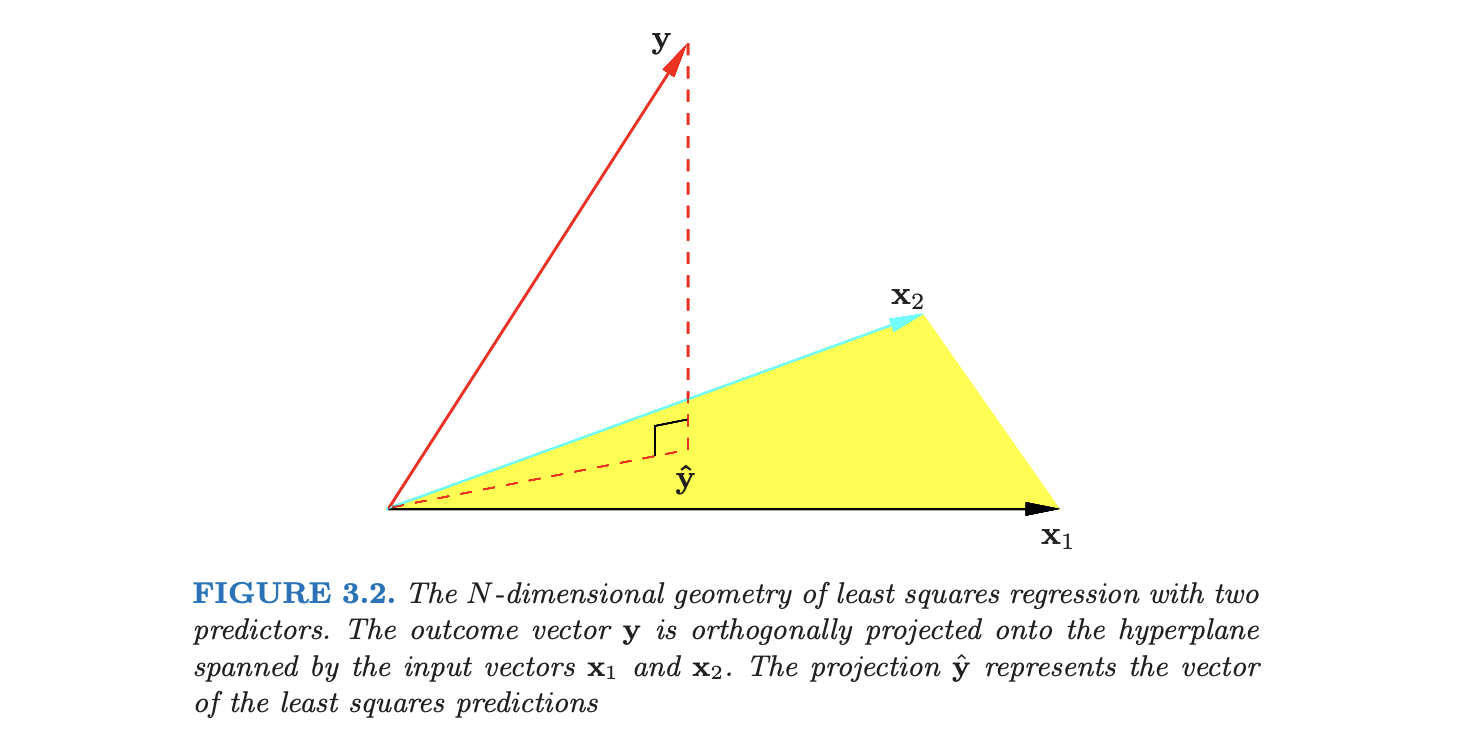

Source: Figure 3.2 from [ESL](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) 

- In this representation, ${\bf y}$ represents the real values for all points, and ${\bf x}_1$ and ${\bf x}_2$ are **columns** of ${\bf X}$. 
- $\hat {\bf y}$ is the vectors of all predictions that lie in the space spaned by ${\bf x}_1$ and ${\bf x}_2$.
- $\hat {\bf y}$ is the orthogonal projection of ${\bf y}$ onto that space and ${\bf y} - \hat {\bf y}$ is the error.



### Alternative geometric interpretation - more formally:

- Assume we have $n$ tuples $({\bf x}_i, y_i)$ where ${\bf x}_i \in \mathbb{R}^p$ and ${y}_i \in \mathbb{R}$, ${\bf y} \in \mathbb{R}^n$.
- ${\bf X}$ is $n\times p$.
- The $p$ columns of ${\bf X}$ span a subset of $\mathbb{R}^n$
    - Recall from linear algebra this subset is called the column space of ${\bf X}$
    

- The vector of predictions for all points $\hat {\bf y}$ is the orthogonal projection of  ${\bf y}$ onto the linear subspace spanned by the columns of ${\bf X}$.
    - Recall this is due to our optimization procedure, in which we set:
$${\bf X}^\top \left({\bf y} - {\bf X} {\bf w}\right ) = 0$$


### What happens if  ${\bf X}^\top{\bf X}$ not invertible?

- Suppose ${\bf X}$ is not full rank, i.e. it's columns are not linearly independent
    - e.g. two of the input dimensions are perfectly correlated
    - e.g. one of the input dimensions is a perfect linear combination of the others
    - or e.g. $p<n$
- Then, ${\bf X}^\top{\bf X}$ is singular and we cannot invert it.
    -  there is not a unique solution $\hat {\bf w}_{\text{OLS}}$
- Solutions to the problem: remove redundancy from ${\bf X}$, regularize (will discuss in a moment), add diagonal component (akin to specific type of regularization, to see later)...

### What if ${\bf X}^\top{\bf X}$ is invertible but too large?

- Inverting ${\bf X}^\top{\bf X}$ might still be very slow!

- Can do gradient descent:
    - initialize ${\bf w}^0$
    - update: $${\bf w}^{t+1} = {\bf w}^{t}-2\eta{\bf X}^\top \left( {\bf X} {\bf w}^{t} - {\bf y} \right )  $$
    
        - The error ${\bf X} {\bf w}^{t} - {\bf y}$ reduces as ${\bf w}^{t+1}$  gets close to $\hat{\bf w}_{\text{OLS}}$
        - convergence depends on learning rate (too small ==> slow, too big ==> possible oscillation and larger error if can't get close enough to $\hat{\bf w}_{\text{OLS}}$. Can use adaptative learning rate.

### Probabilistic interpretation:  MLE

- We state the problem as:

\begin{eqnarray}
Y_i &=& {\bf x}_i^\top {\bf w} + \epsilon_i \\ 
\epsilon_i &\sim&  \mathcal{N}(0,\sigma)\\
Y_i &\sim& \mathcal{N}({\bf x}_i^\top {\bf w}, \sigma) 
\end{eqnarray}

- Maximizing the log-likelihood of the data simplifies to:

\begin{eqnarray}
\hat w_{\text{MLE}} &=& \underset{{\bf w}}{\operatorname{argmax}} \log \left[\prod_i \frac{1}{\sqrt{2\pi \sigma^2}}\exp\frac{-(y_i - {\bf x}_i^\top {\bf w})^2}{ 2\sigma^2} \right] \\ 
&=& \underset{{\bf w}}{\operatorname{argmin}} \sum_i \left( y_i - {\bf x}_i^\top {\bf w} \right)^2 \\ 
\end{eqnarray}

This is the least squares problem! ==> same solution


## Approach 2 - Ridge regression, adding L2 regularization

- Ridge regression minimizes the Residual Sum of Squares (RSS) with an additional penalty on the $L_2$ norm of ${\bf w}$:
\begin{eqnarray}
\hat {\bf w}_{\text{Ridge}}  =  \underset{{\bf w}}{\operatorname{argmin}}  \sum_{i=1}^n \left(y_i - {\bf x}_i^\top {\bf w} \right)^2 + \lambda \sum_j w_j^2
\end{eqnarray}
- where $\lambda\ge0$ is a penalty parameter

- Note: in practice, we often don't penalize the intercept term. Instead we first estimate the intercept as $\bar{\bf y}$ and remove it from ${\bf y}$, and run ridge regression with no intercept. Then we set the intercept as $\bar{\bf y}$.

- In matrix notation: $
~ ~ ~ ~ ~ ~ ~ ~ ~ \hat {\bf w}_{\text{Ridge}}  =  \underset{{\bf w}}{\operatorname{argmin}} \left({\bf y} - {\bf X} {\bf w} \right)^\top \left({\bf y} - {\bf X} {\bf w} \right) + \lambda {\bf w}^\top{\bf w}
$

- Solving

 \begin{eqnarray}
\frac{d \text{RSS}({\bf w})+  \lambda {\bf w}^\top{\bf w} }{ d {\bf w}} = -2 {\bf X}^\top \left({\bf y} - {\bf X} {\bf w} \right) + 2 \lambda {\bf w} &=& 0\\
\left ({\bf X}^\top{\bf X} +\lambda {\bf I}_p\right) {\bf w} = {\bf X}^\top {\bf y} 
\end{eqnarray}

- We get:

 \begin{eqnarray}
\hat {\bf w}_{\text{Ridge}} = 
\left ({\bf X}^\top{\bf X} +\lambda {\bf I}_p\right)^{-1}{\bf X}^\top {\bf y} 
\end{eqnarray}


### Probabilistic interpretation

- We state the problem as:

\begin{eqnarray}
Y_i &=& {\bf x}_i^\top W + \epsilon_i \\ 
\epsilon_i &\sim&  \mathcal{N}(0,\sigma)\\
Y_i\mid W &\sim& \mathcal{N}({\bf x}_i^\top W, \sigma) \\
W_j &\sim&  \mathcal{N}(0,\gamma)\\
\end{eqnarray}

- Maximizing the log-posterior probability of $W$:

\begin{eqnarray}
\hat w_{\text{MAP}} &=& \underset{{\bf w}}{\operatorname{argmax}} \log P(W) P(Y\mid W)\\
 &=&  \underset{{\bf w}}{\operatorname{argmax}}
\log \left( \left[ \prod_j \frac{1}{\sqrt{2\pi \gamma^2}} 
\exp\frac{- w_j^2}{ 2\gamma^2}
\right] \left[\prod_i \frac{1}{\sqrt{2\pi \sigma^2}}\exp\frac{-(y_i - {\bf x}_i^\top {\bf w})^2}{ 2\sigma^2} \right] \right) \\ 
\end{eqnarray}

- Exercise: show that this results in the same problem as ridge regression
    - Ridge regression is equivalent to enforcing a zero mean gaussian prior on the individual weights.



### What is the effect of $\lambda$? Which $\lambda$ to choose?

\begin{eqnarray}
\hat {\bf w}_{\text{Ridge}}  &=&  \underset{{\bf w}}{\operatorname{argmin}} \left({\bf y} - {\bf X} {\bf w} \right)^\top \left({\bf y} - {\bf X} {\bf w} \right) + \lambda {\bf w}^\top{\bf w}\\
&=& \left ({\bf X}^\top{\bf X} +\lambda {\bf I}_p\right)^{-1}{\bf X}^\top {\bf y} 
\end{eqnarray}


- think of $\lambda$ as a shrinkage parameter varying how much the weights are allowed to be close to the OLS solution.
    - when $\lambda \rightarrow 0$, $\hat {\bf w}_{\text{Ridge}} \rightarrow \hat {\bf w}_{\text{OLS}} $ 
    - when $\lambda \rightarrow \infty$, $\hat {\bf w}_{\text{Ridge}} \rightarrow 0_p $  (vector of 0s)


    
Let's look at a specific problem with two input features $x_1$ and $x_2$.

In [5]:
w1x = np.linspace(-3,3,100)
w2x = np.linspace(-3,3,100)
W1,W2 = np.meshgrid(w1x, w2x)

X = multivariate_normal.rvs(mean=np.array([0,0]),cov=1,size=20)
real_w = np.array([[0.8],[-1.5]])
Y = X.dot(real_w) + 0.4*norm.rvs(size=(20,1))

def rss(w1,w2):
    w = np.array([[w1],[w2]])
    loss = np.sum( (Y - X.dot(w)) **2) 
    return loss
  

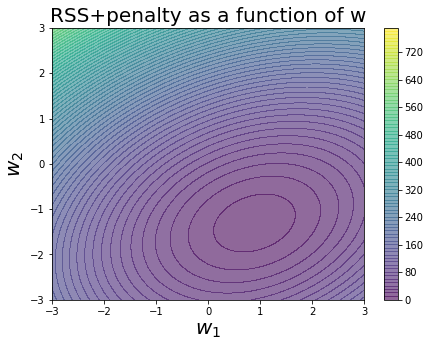

In [6]:
plt.figure(figsize=(7,5))

lmbda = 0.1
L_w = np.vectorize(rss)(*np.meshgrid(w1x, w2x)) +lmbda*(W1**2+W2**2)

cs = plt.contourf(W1, W2, L_w,levels=np.arange(0,800,10),alpha=0.6);
plt.colorbar()
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('RSS+penalty as a function of w',fontsize=20);

### Alternative formulation of optimization problem

\begin{eqnarray}
\hat {\bf w}_{\text{Ridge}}  =  \underset{{\bf w}}{\operatorname{argmin}} \sum_i \left( y_i- {\bf x}_i^\top {\bf w} \right)^2 + \lambda \sum_j w_j^2
\end{eqnarray}

- Can also be written as 

\begin{eqnarray}
\hat {\bf w}_{\text{Ridge}}  &=&  \underset{{\bf w}}{\operatorname{argmin}} \sum_i \left( y_i- {\bf x}_i^\top {\bf w} \right)^2 \\
&& \text{subject to }  \sum_j w_j^2 \le t
\end{eqnarray}

- where, for each problem, there is a one-to-one correspondance between specific values of $\lambda$ and $t$. We can use this formulation to better understand the effect of the constraint on the value of the parameters that is chosen 


/Users/lwehbe/env/py3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


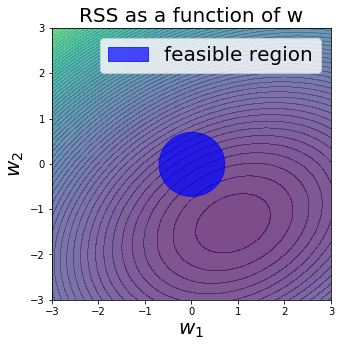

In [7]:
plt.figure(figsize=(5,5))

lmbda = 0.1
L_w = np.vectorize(rss)(*np.meshgrid(w1x, w2x))

cs = plt.contourf(W1, W2, L_w,levels=np.arange(0,800,10),alpha=0.7,aspect='equal');
plt.xlabel(r'$w_1$',fontsize=20)
plt.ylabel(r'$w_2$',fontsize=20)
plt.title('RSS as a function of w',fontsize=20);

t = 0.5
w1x_plot = np.linspace(-3,3,1000)
w1x_plot = w1x_plot[w1x_plot**2<=t]
w2_plot = np.nan_to_num(np.sqrt(t - w1x_plot**2))
plt.fill_between(w1x_plot, w2_plot, -w2_plot ,color='b',alpha=0.7,label='feasible region');
plt.legend(fontsize=20);

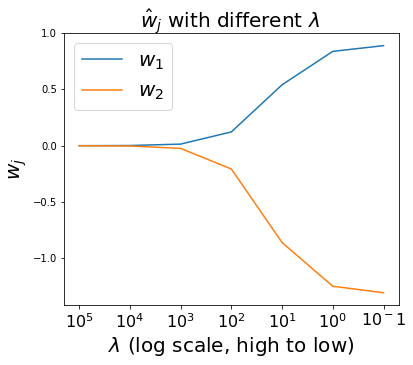

In [8]:
plt.figure(figsize=(6,5))
from numpy.linalg import inv

def ridge(X,Y,lmbda):
    p = X.shape[1]
    return inv(X.T.dot(X) + lmbda*np.eye(p)).dot(X.T.dot(Y))

lmbdas = np.array([0.1,1,10,100,1000,10000,100000])
w_lambda = np.hstack([ridge(X,Y,L) for L in lmbdas])
plt.plot(np.arange(len(lmbdas)),w_lambda[0][::-1],label=r'$w_1$')
plt.plot(np.arange(len(lmbdas)),w_lambda[1][::-1],label=r'$w_2$')

xlabels = [r'$10^{}$'.format(int(np.log10(L))) for L in lmbdas]
plt.xticks(np.arange(len(lmbdas)), xlabels[::-1],fontsize=16 )

plt.xlabel(r'$\lambda$ (log scale, high to low)',fontsize=20)
plt.ylabel(r'$w_j$',fontsize=20)
plt.title('$\hat w_j$ with different $\lambda$ ',fontsize=20)
plt.legend(fontsize=20);

### Effect of $\lambda$

- when $\lambda \rightarrow 0$: $\hat {\bf w}_{\text{Ridge}} \rightarrow \hat {\bf w}_{\text{OLS}} $ 
- when $\lambda \rightarrow \infty$: $\hat {\bf w}_{\text{Ridge}} \rightarrow 0_p $  (vector of 0s)

### Bias-variance trade-off

- Given a joint distribution $P(X,Y)$,  let ${\bf w}^* \in \mathbb{R^p}$ the parameters of the best linear approximation of $Y$ given $X$. 
    - We attempt to estimate ${\bf w}^*$ using a finite sample from  $P(X,Y)$. 
- How good is our estimate $\hat {\bf w}$?
    - bias: if we could repeat the experiment multiple times (and thus calculate $\hat {\bf w}$ multiple times), would the average $\hat {\bf w}$ be close to ${\bf w}^*$?
    - variance: if we could repeat the experiment multiple times, how much would the $\hat {\bf w}$s agree? would they be very different?

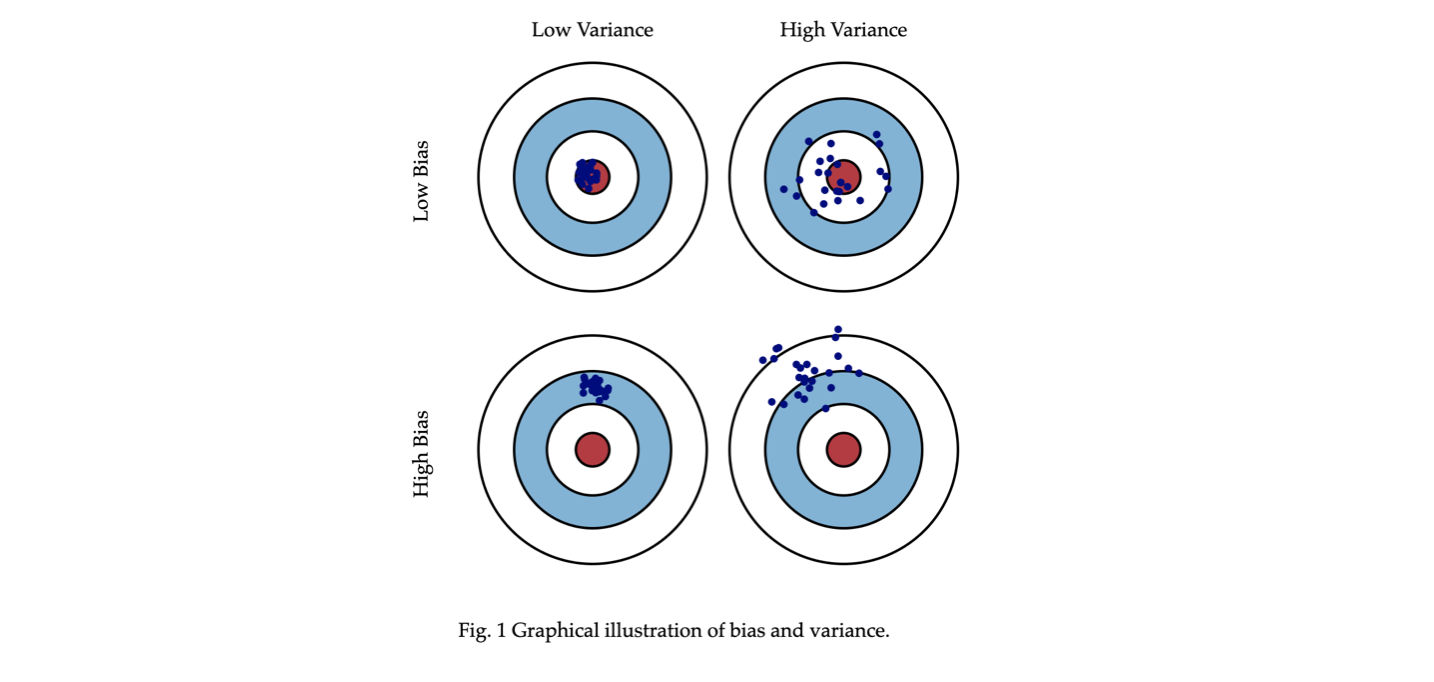
Source: [Understanding the Bias Variance Tradeoff by Scott Fortmann-Roe](http://scott.fortmann-roe.com/docs/BiasVariance.html)

### Effect of $\lambda$ - tradeoff between bias and variance

- when $\lambda \rightarrow 0$: high variance, bias $\rightarrow 0$ (OLS solution is unbiased)
- when $\lambda \rightarrow \infty$: high bias, variance $\rightarrow 0$ (since converging to the zero vector)
    

## Approach 3 - Lasso, adding L1 regularization

- The  minimizes the Residual Sum of Squares (RSS) with an additional penalty on the $L_1$ norm of ${\bf w}$:

\begin{eqnarray}
\hat {\bf w}_{\text{Lasso}}  =  \underset{{\bf w}}{\operatorname{argmin}}  \sum_{i=1}^n \left(y_i - {\bf x}_i^\top {\bf w} \right)^2 + \lambda \sum_j |w_j|
\end{eqnarray}

- where $\lambda\ge0$ is a penalty parameter

- Alternative formulation of optimization problem

\begin{eqnarray}
\hat {\bf w}_{\text{Lasso}}  &=&  \underset{{\bf w}}{\operatorname{argmin}} \sum_i \left( y_i- {\bf x}_i^\top {\bf w} \right)^2 \\
&& \text{subject to }  \sum_j |w_j| \le t
\end{eqnarray}

- where, for each problem, there is a one-to-one correspondance between specific values of $\lambda$ and $t$. 

- The Lasso is also equivalent to imposing a Laplace prior on the parameters $w_j\sim\exp\frac{-|w_j|}{b}$ .





### Lasso optimization problem

- The Lasso optimization problem does not have a closed form solution, quadratic optimization problem. 
    - More in 10-725
- The Lasso problem encourages sparsity! With high penalty (high $\lambda$ or low $t$), few parameters will be non-zero
    - Think of it as taking a bet that only a few parameters are important
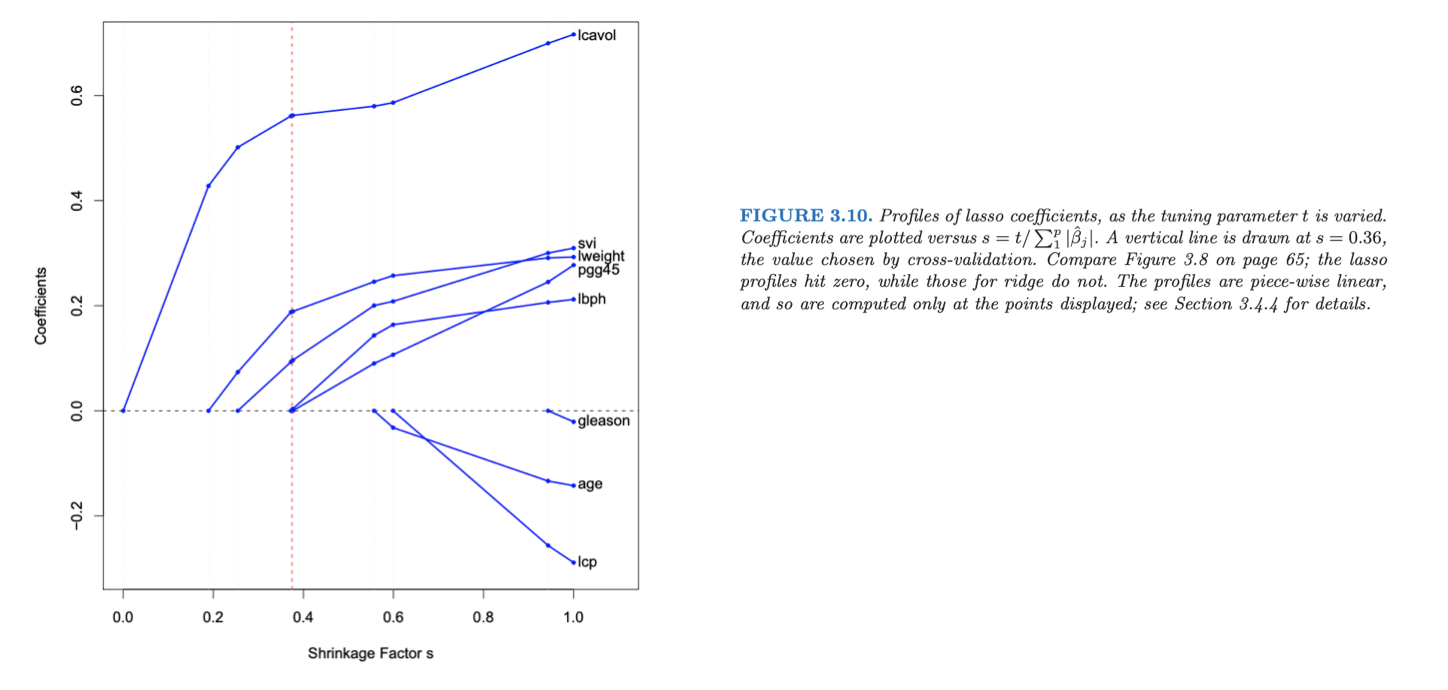
Source: Figure 3.10 from [ESL](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) 


## Compare to Ridge solution

- High penalty causes weights to become smaller, but without being exactly 0.
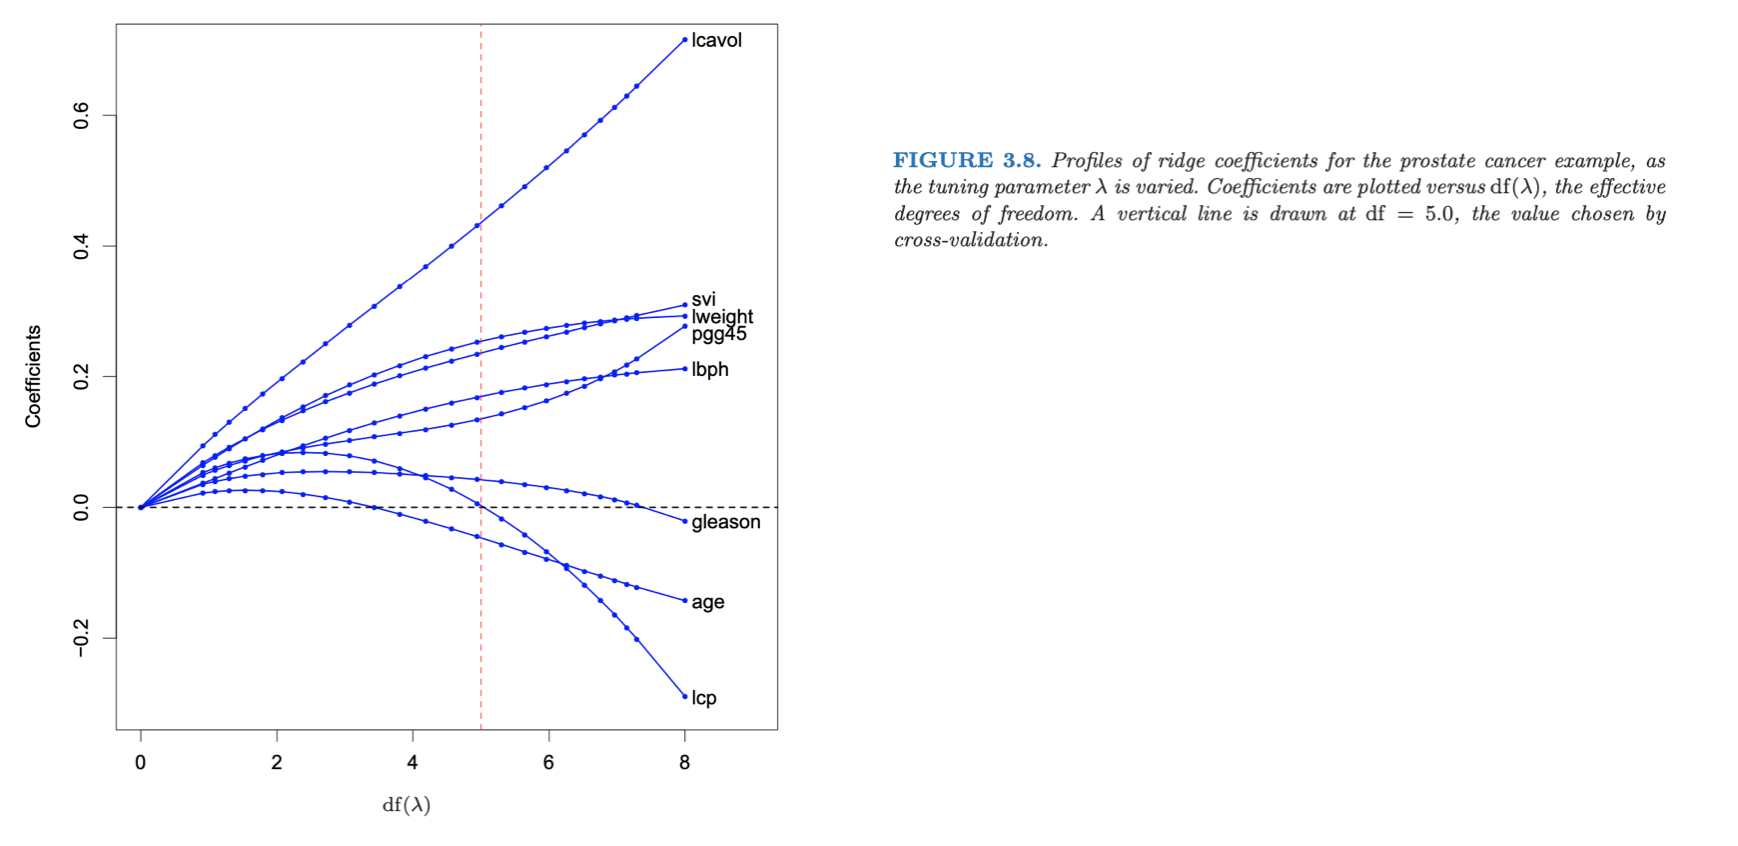
Source: Figure 3.8 from [ESL](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) 



### Lasso vs. Ridge solution

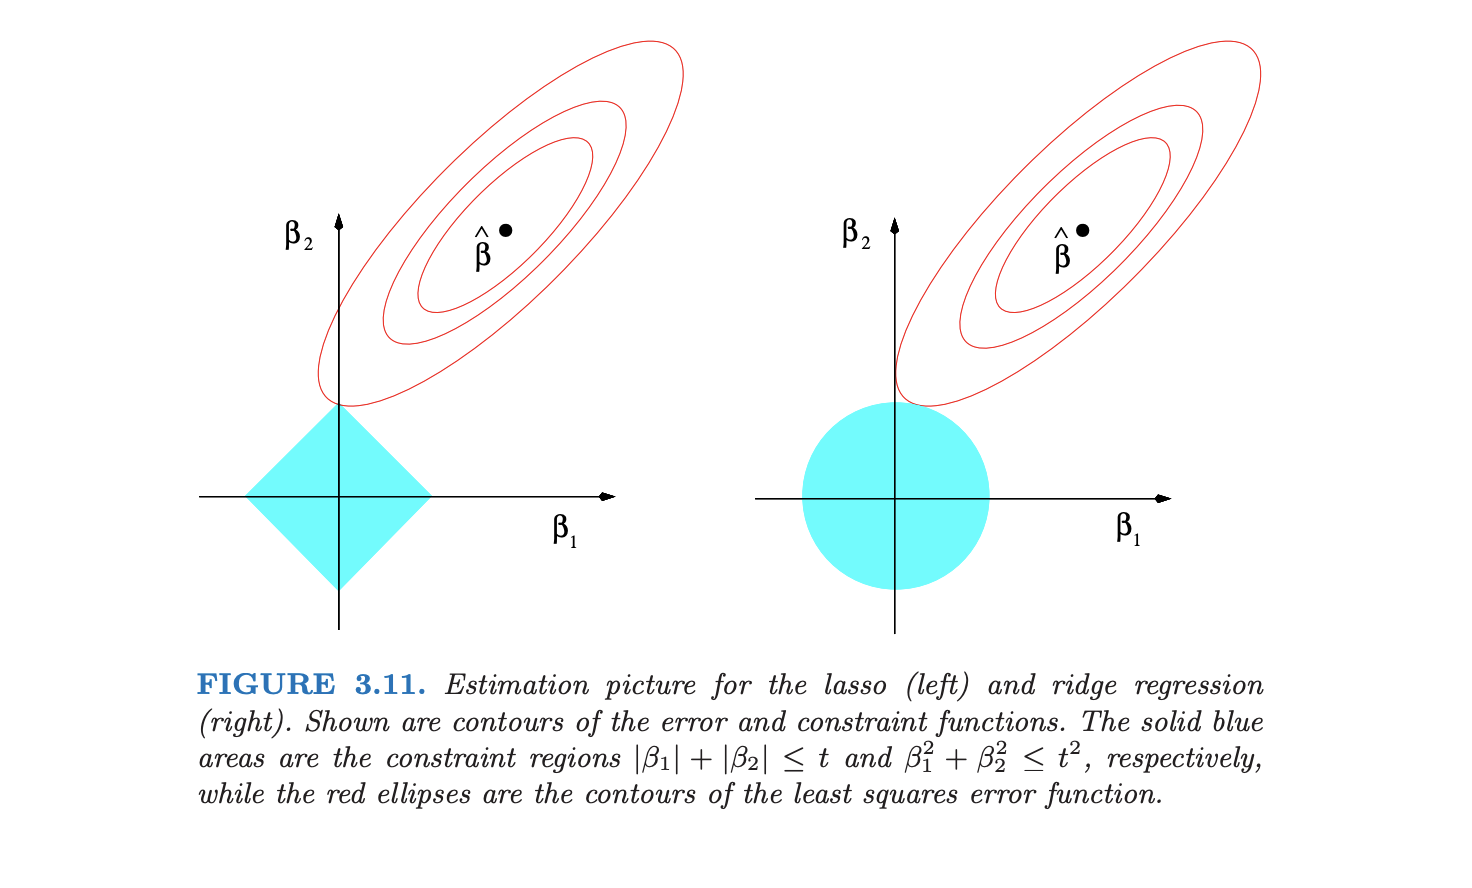
Source: Figure 3.11 from [ESL](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf) 
- In high dimensions, in Lasso, more likely to encounter edges or peaks.

## How to pick $\lambda$?

- Divide training set into train and validation:
    - train with different $\lambda$ settings
    - pick the $\lambda$ with smallest **validation** error (not test error!)

- K-fold cross-validation:
    - Divide your training set into K folds, for each fold i:
        - train with different $\lambda$ settings on the other K-1 folds
        - compute error on fold i for each $\lambda$
    - average error across fold and pick $\lambda$ with smallest cross-validation error

- Other types of cross-validation (leave-one-out cross-validation etc...)

## What you should know 

- Linear regression definition 
- OLS solution and interpretation
- Ridge solution and tradeoff
- Lasso (just the penalty and what it optimizes for)

There is a lot more to learn about regression!
- Class in statistics department (e.g. 36-707)
- questions to think about:
    - what happens when Y is multidimensional? How to adapt the solution?
    - see section 3.4.1 for an interpretation of the effect of Ridge on different dimensions in the $X$ (there is more shrinkage applied to the directions of variance corresponding to the small eigenvalues).
    - how can we use the ridge regression solution to formulate kernel regression?
    